# Phasenfeldmodell in 2D

Einbinden der nötigen Bibliotheken __[numpy](https://numpy.org)__ &  __[matplotlib](https://matplotlib.org)__.

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d

Zunächst werden noch einmal alle Gleichungen des Modells in zwei Raumdimensionen vorgestellt. 
## Energiefunktional
Wir beginnen mit dem freien Energiefunktional 

$$F\left[\phi(x,y,t)\right]=\int_{-\infty}^{\infty}\underbrace{\left(\frac{U}{2}\left[a^{2}\left((\partial_{x}\phi)^{2}+(\partial_{y}\phi)^{2}\right)+g(\phi)\right]+\mu_{0}h(\phi)\right)}_{f(\phi,\partial_{x}\phi,\partial_{y}\phi)}dx, $$

wobei $a$ und $U$ Konstanten der Dimensionen Länge bzw. Energie sind, $f(\phi,\partial_{x}\phi,\partial_{y}\phi)$ die lokale Energiedichte bezeichnet und $\mu_{0}$ der Unterschied in den chemischen Potenzialen der beiden Phasen ist, welcher je nach Vorzeichen das Wachstum der einen oder der anderen Phase hervorruft. Dabei steht $g(\phi)=\phi^{2}(1-\phi)^{2}$ für das Doppelmuldenpotenzial, und $h(\phi)=\phi^{2}(3-2\phi)$ ist das Interpolationspolynom. 
Man beachte, dass zum Erhalt der Integrität der Phasen $\mu_{0}$ dem Betrag nach kleiner als $U/6$ sein muss, d.h. $|\mu_{0}|<U/6$.

## Phasenfeldgleichung

Der Variationsansatz liefert als kinetische Entwicklungsgleichung des Phasenfeldmodells die folgende partielle Differenzialgleichung

$$
\begin{align}
\frac{1}{M_{\phi}}\frac{\partial\phi}{\partial t}&=-\frac{\delta F}{\delta\phi}\\
 &=\partial_{x}\frac{\partial f}{\partial\left(\partial_{x}\phi\right)}+\partial_{y}\frac{\partial f}{\partial\left(\partial_{y}\phi\right)}-\frac{\partial f}{\partial\phi}\\
 &=U\left(a^{2}(\partial_{x}^{2}\phi+\partial_{y}^{2}\phi)-\frac{1}{2}\frac{\partial g(\phi)}{\partial\phi}\right)-\mu_{0}\frac{\partial h(\phi)}{\partial\phi}.
\end{align}
$$

$M_\phi$ ist der kinetische Koeffizient.
Für die partiellen Ableitungen des Doppelmuldenpotenzials $\partial_\phi g(\phi)=2\phi(1-\phi)(1-2\phi)$ und des Interpolationspolynoms $\partial_\phi h(\phi)=6\phi(1-\phi)$ definieren wir jeweils eine Funktion:

In [2]:
def gprim(phi):
        return 2*phi*(1.0-phi)*(1.0-2.0*phi)

def hprim(phi):
        return 6.0*phi*(1.0-phi)

Wir kalibrieren das Phasenfeldmodell gemäß der Übung. D.h. wir gehen von den Phasenfeldparametern $a,U,M_\phi$ über zu den Parametern $\xi = 2a$ für die Phasenfeldgrenzflächenbreite, $\Gamma = aU/6$ für die Grenzflächenenergie und $M=M_\phi a^2U$ als kinetischen Koeffizienten. Mit dem kalibrierten kinetischen Koeffizienten $M [m^2/s]$, der die physikalische Einheit eines Diffusionskoeffizienten hat, ergibt sich folgende Beziehung zwischen der Triebkraft $\mu_0$ für die Phasenumwandlung und der resultierenden stationären Grenzflächengeschwindigkeit $v$  

$$
v = \frac{M}{\Gamma}\mu_0=K\mu_0.
$$

Damit ergibt sich folgende Beziehung zwischen dem kalibrierten kinetischen Koeffizienten $M$ im Phasenfeldmodel und dem in der Vorlesung zur Erstarrung und Keimbildung eingeführten kinetischen Koeffizienten $K$: $$M=K\Gamma.$$

## Numerische Diskretisierung der Phasenfeldgleichung

Mit den Parametern $\xi = 2a$ für die Phasenfeldgrenzflächenbreite, $\Gamma = aU/6$ für die Grenzflächenenergie und $M=M_\phi a^2U$ als kinetischem Koeffizienten ändert sich die Phasenfeldgleichung zu der folgenden nichtlinearen partiallen Differenzialgleichung

$$
\begin{align}
\frac{1}{M}{\partial_t\phi}&=\underbrace{\partial_{x}^{2}\phi+\partial_{y}^{2}\phi}_{\mathrm{Laplace-Operator}}-\frac{2}{\xi^2}{\partial_\phi g(\phi)}-\frac{\mu_{0}}{3\Gamma\xi}{\partial_\phi h(\phi)}.
\end{align}
$$

Die Phasenfeldgleichung ähnelt der partiellen Differenzialgleichung für die thermische Diffusion, welche im Rahmen der Vorlesung Materialsimulation I behandelt wurde. Insbesondere die Zeitentwicklung und der Laplace-Operator sind formgleich. Einen entscheidenden Unterschied machen die nichtlinearen Potenzialterme, die bei der Phasenfeldgleichung noch hinzu kommen. 

Die Phasenfeldgleichung soll gemäß dem in der Vorlesung Materialsimulation I behandelten expliziten Finiten Differenzen Verfahrens numerisch diskretisiert werden. Die erste  Zeitableitung wird gemäß dem expliziten Eulerverfahren wie folgt diskretisiert

$${\partial_t\phi}\quad \rightarrow \quad \frac{\phi_{i,k}^{n+1}-\phi_{i,k}^{n}}{\Delta t}$$

Die zweiten Raumableitungen werden wie folgt diskretisiert

$${\partial_x^2\phi}\quad \rightarrow \quad \frac{\phi_{i+1,k}^{n}+\phi_{i-1,k}^{n}-2\phi_{i,k}^{n}}{\Delta x^2}$$

$${\partial_y^2\phi}\quad \rightarrow \quad \frac{\phi_{i,k+1}^{n}+\phi_{i,k-1}^{n}-2\phi_{i,k}^{n}}{\Delta x^2}$$

Insgesamt erhalten wir die folgende diskretisierte Phasenfeldgleichung

$$
\frac{1}{M}\frac{\phi_{i,k}^{n+1}-\phi_{i,k}^{n}}{\Delta t}=\mathrm{d}\phi^{n}_{i,k}=\frac{\phi_{i+1,k}^{n}+\phi_{i-1,k}^{n}+\phi_{i,k+1}^{n}+\phi_{i,k-1}^{n}-4\phi_{i,k}^{n}}{\Delta x^{2}}-\frac{2}{\xi^{2}}\partial_{\phi}g(\phi_{i,k}^{n})-\frac{\mu_{0}}{3\Gamma\xi}\partial_{\phi}h(\phi_{i,k}^{n}),
$$

dabei haben wir das Differenzphasenfeld $\mathrm{d}\phi^{n}_{i,k}$ eingeführt, welches der rechte Seite der Phasenfeldgleichung entspricht.

## Berechnung des Differenzphasenfeldes

Die rechte Seite der Phasenfeldgleichung entspricht dabei dem Differenzphasenfeld $\mathrm{d}\phi^n_{i,k}$.

In [3]:
def solve_phasefield(phi,dphi,delta_x,xi,gamma_s,mu0,mgrid,ngrid):
    for i in range(1,mgrid-1):
        for k in range(1,ngrid-1):# for every inner point
            laplace=(phi[i+1][k]+phi[i-1][k]+phi[i][k+1]+phi[i][k-1]-4.0*phi[i][k])/(delta_x*delta_x)
            dphi[i][k] = laplace - 2.0*gprim(phi[i][k])/(xi*xi) + mu0/(3*gamma_s*xi)*hprim(phi[i][k])

Mann beachte dass die Zählschleifen über den $x-$Index $i$ und den $y-$Index $k$ nur über das Innere des 2D Feldes, nicht aber über den Rand des Gebietes gehen. Die Randwerte werden über separate Randbedingungen festgelegt.

## Zeitentwicklung des Phasenfeldes
In Bezug auf die Zeitabhängigkeit des Phasenfeldes beschränken wir uns im Programm aus Gründen der Effiziens nur auf ein Phasenfeld $\phi^n_{i,k}$ zum aktuellen Zeitschritt $n$, und das aktuelle Differenzphasenfeld $\mathrm{d}\phi^n_{i,k}$, mit welchem das Phasenfeld $\phi^{n+1}_{i,k}$ zum nächsten Zeitschritt über 

$$\phi^{n+1}_{i,k}=\phi^{n}_{i,k}+M\cdot\Delta t\;\mathrm{d}\phi^n_{i,k}$$ 

berechnet werden kann. $\Delta t$ bezeichnet dabei die Zeit zwischen zwei Zeitschritten. Das Phasenfeld $\phi^n_{i,k}$ sowie auch das Differenzphasenfeld $\mathrm{d}\phi^n_{i,k}$ werden gemäß der Phasenfeldgleichung von einem Zeitschritt zum nächsten immer wieder überschrieben.

In [4]:
def update_phasefield(phi,dphi,delta_t,M,mgrid,ngrid):
    for i in range(1,mgrid-1):
        for k in range(1,ngrid-1):# for every inner point
            phi[i][k] += M * delta_t * dphi[i][k]

Mann beachte dass auch in diesem Fall die Zählschleifen über den $x-$Index $i$ und den $y-$Index $k$ nur über das Innere des 2D Feldes, nicht aber über den Rand des Gebietes, gehen. Die Randwerte werden über Randbedingungen festgelegt.

## Randbedingungen

Für die vier verschiedenen Randkannten unseres 2D Feldes definieren wir von Neumann Randbedingungen für das Phasenfeld. Dabei soll der Phasenfeldfluss durch den Rand jeweils verschwinden, was im Falle der Temperaturdiffusion einer thermisch isolierenden Randbedingungen entspricht.

In [5]:
def set_left_boundary(field,mgrid,ngrid):
        for k in range(ngrid):
                field[0][k] = field[1][k]
#******************************************************************
def set_right_boundary(field,mgrid,ngrid):
        for k in range(ngrid):
                field[mgrid-1][k] = field[mgrid-2][k]
#******************************************************************
def set_top_boundary(field,mgrid,ngrid):
        for i in range(mgrid):
                field[i][ngrid-1] = field[i][ngrid-2]
#******************************************************************
def set_bottom_boundary(field,mgrid,ngrid):
        for i in range(mgrid):
                field[i][0] = field[i][1]
#******************************************************************
def set_boundary(field,mgrid,ngrid):
    set_left_boundary(field,mgrid,ngrid)
    set_right_boundary(field,mgrid,ngrid)
    set_top_boundary(field,mgrid,ngrid)
    set_bottom_boundary(field,mgrid,ngrid)

## Momentaner Phasenanteil
Zur Überwachung der numerischen Lösung berechnen wir das aktuelle Phasenvolumen der $\phi = 1-$Phase aus dem Phasenfeldintegral. Die zeitliche Entwicklung des Phasenvolumen kann anschließend mit der theoretischen Erwartung verglichen werden. Mann beachte dass auch für die Berechnung des Feldintegrals die Zählschleifen über den $x-$Index $i$ und den $y-$Index $k$ nur über das Innere des 2D Feldes, nicht aber über den Rand des Gebietes, gehen.

In [6]:
def integral(field, delta_x):
    integral = 0.0
    for i in range(1,len(field)-1):
        for k in range(1,len(field[i])-1):
            integral += field[i][k] * delta_x**2
    return integral

# Stationär fortschreitende Phasenumwandlung

Wir betrachten ein rechteckiges System mit Abmessungen $3\times100$.

In [7]:
#Parameters of the model
Gamma = 1.0                  # [J/m^2] interface energy 
xi    = 1.5                  # [m] phasefield interface width 
M     = 1.0                  # [m^2/s] kinetic coefficient 
mu0   = 0.1                  # [J/m^3] bulk energy density difference (driving force)

delta_t = 1.e-1              # [s] timestep

## Repräsentation des Phasenfeldes
Das Phasenfeld $\phi(x,y,t)$ ist eine zeitabhängige Funktion, die auch von den Raumkoordinaten $x$ und $y$ abhängt. Zur Repräsentation des Phasenfeldes in diesem Programm legen wir  insgesamt zwei 2D-Felder aus Gleitkommazahlen an. 
Ein 2D Feld ist dabei ein Objekt aus $m_{grid}\times n_{grid}$ Gleitkommazahlen. 
In der $x-$ Richtung besteht das Feld aus $m_{grid}-$ Spalten und in der $y-$ Richtung aus $n_{grid}-$ Zeilen. 
Die jeweils Erste und die jeweils Letzte der $m_{grid}-$ Spalten oder der $n_{grid}-$ Zeilen gehören zum Rand des Feldes. Hier müssen Randbedingungen erfüllt werden. Die Phasenfeldwerte an allen anderen Punkten des numerischen Gitters werden mit Hilfe der Phasenfeldgleichung, einer nichtlinearen partiellen Differentialgleichung, berechnet. Das numerische Gitter sei der Einfachheit halber ein Quadratgitter, d.h. der Abstand $\Delta x$ zwischen Gitterpunkten sei in $x-$ Richtung genauso groß wie in $y-$ Richtung.

In [8]:
# Initialize grid parameters
mgrid   = 3    # number of grid points in x direction, including boundary points
ngrid   = 100  # number of grid points in y direction, including boundary points
delta_x = 1.0  # [m] grid spacing 

Als nächstes werden musterhaft Objekte für die beiden 2D-Felder angelegt. Ein 2D Feld kann z.B. mit Hilfe von zwei verschachtelten Zählschleifen erzeugt werden. In diesem Fall gibt es eine äußere Zählschleife, die über die $m_{grid}-$Spalten zählt. Für jede dieser Spalten werden in einer inneren Zählschleife $n_{grid}-$Gleitkommazahlen anlegt und mit dem Wert $0.0$ initialisiert.

In [9]:
#create the 2D field objects
phi     = np.array([[0.0 for k in range(ngrid)] for i in range(mgrid)])
dphi    = np.array([[0.0 for k in range(ngrid)] for i in range(mgrid)])

Zum Zeitpunkt $t=0$ muss dass Phasenfeld im Sinne eines Anfangswertes im gesamten Gebiet vorgegeben werden. Bei $t=0$ soll sich ein viertel eines kreisförmigen Keims mit Radius $y_0=20.0$ im System befinden. Unten $(y<y_0)$ soll das Phasenfeld den Wert $\phi=1$ haben, und oben $(y>y_0)$ soll es den Wert $\phi=0$. Die Grenzfläche soll gemäß dem Gleichgewichtsprofil des Phasenfeldmodells 

$$
\phi_0(x,y) = \frac{1}{2}\left(1 - \mathrm{tanh}\frac{y-y_0}{\xi}\right)
$$

durch einen glatten Übergang der Breite $\xi = 2a$ repräsentiert sein. Wir definieren zunächst eine 2D Funktion, die mit Hilfe der mathematischen Funktion $\mathrm{tanh}$ entsprechende Werte liefert.

In [10]:
def phase_front(x,y,y_0,xi):
    return 0.5*(1.0 - np.tanh((y-y_0)/xi))

# initialization of the phase field
y_0   = 20.0
center = np.array([0.0*mgrid*delta_x,0.0*ngrid*delta_x])
for i in range(mgrid):
    for k in range(ngrid):
        phi[i][k] = phase_front(delta_x*i,delta_x*k,y_0,xi)

Nach dem die 2D Felder angelegt und initialisiert sind, kann auf den Feldwert am Gitterpunkt $i, k$ wie nachstehend gezeigt zugegriffen werden.

In [11]:
i = 1
k = 4
print(phi[i][k])

0.9999999994566858


Darstellung des Ausgangsphasenfeldes mit Hilfe der Bibliothek  __[matplotlib](https://matplotlib.org)__.

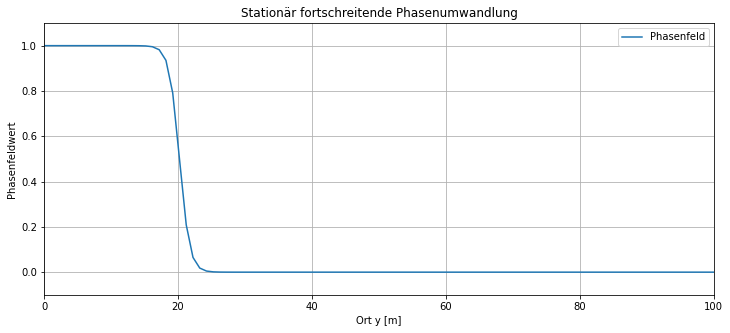

In [12]:
x = np.linspace(0, ngrid*delta_x, ngrid)
#y1 = np.sin(np.radians(x))
#y2 = np.cos(np.radians(x))

fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(1, 1, 1)
ax.set_title('Stationär fortschreitende Phasenumwandlung')
ax.set_xlabel('Ort y [m]')
ax.set_ylabel('Phasenfeldwert')
ax.set_xlim(0, ngrid*delta_x)
ax.set_ylim(-0.1, 1.1)
ax.grid()

i = 1

ax.plot(x, phi[i], label='Phasenfeld')
ax.legend()

plt.show()

## Phasenfeldsimulation

Neben der Festlegung der Zahl der Zeitschritte für die Hauptzeitschleife, legen wir leere Listen für die momentane $y-$Position der Grenzflächenmitte und Zeiten an. Der erste Eintrag in den Listen ist der gemessene Ausgangssituation und die Zeit $t=0$. 

In [13]:
nloop   = 1001           # number of time steps 
time    = 0.0
outstep = 10             # the y-position are measured only every outstep time step

t_list    = []           # list of the times
pos_list  = []           # list of the y-position

def position(phi,delta_x): 
    return integral(phi,delta_x)/((mgrid-2)*delta_x) + 0.5*delta_x

pos = position(phi,delta_x)
t_list.append(time)
pos_list.append(pos)
print('time = ', time, 'position = ', pos)

time =  0.0 position =  20.000000000003567


In der Hauptzeitschleife müssen wir in jedem Zeitschritt zunächst das Differenzphasenfeld mit Hilfe der Phasenfeldgleichung auf Basis des aktuellen Phasenfeldes inklusive der aktuellen Randwerte berechnen. Anschließend wird das Phasenfeld zum neuen Zeitschritt mit Hilfe des Differenzphasenfeldes berechnet und überschrieben. Dann werden die Randwerte zum aktuellen Zeitschritt auf Basis der Randbedingungen berechnet und überschrieben.

In [14]:
#the main time loop
for Step in range(nloop):
    solve_phasefield(phi,dphi,delta_x,xi,Gamma,mu0,mgrid,ngrid)
    update_phasefield(phi,dphi,delta_t,M,mgrid,ngrid)
    set_boundary(phi,mgrid,ngrid)
    time += delta_t
    if Step%outstep == 0: # the measurement of the current radius only every outstep steps 
        pos = position(phi,delta_x)
        print('time = ', time, 'position = ', pos)
        t_list.append(time)
        pos_list.append(pos)

time =  0.1 position =  20.010000220285725
time =  1.0999999999999999 position =  20.108568103011653
time =  2.1000000000000005 position =  20.206094155811105
time =  3.1000000000000014 position =  20.303858391093247
time =  4.100000000000001 position =  20.401320464341236
time =  5.099999999999998 position =  20.497585287575507
time =  6.099999999999994 position =  20.592131916380684
time =  7.099999999999991 position =  20.68505351480358
time =  8.099999999999987 position =  20.776988619527728
time =  9.099999999999984 position =  20.868874775601505
time =  10.09999999999998 position =  20.96164840656665
time =  11.099999999999977 position =  21.05596605668356
time =  12.099999999999973 position =  21.15199119828277
time =  13.09999999999997 position =  21.249304059280696
time =  14.099999999999966 position =  21.347005630083476
time =  15.099999999999962 position =  21.44403193899507
time =  16.09999999999996 position =  21.539566194848767
time =  17.099999999999973 position =  21.6

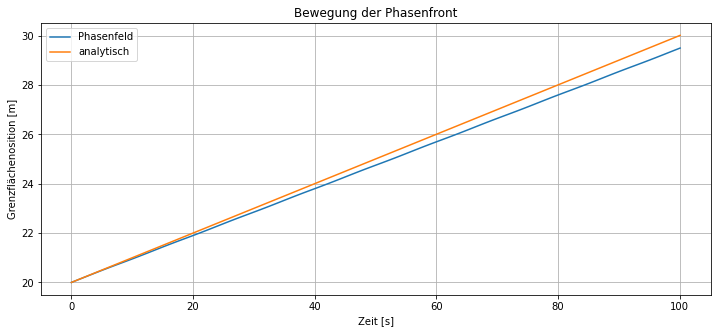

In [15]:
t = np.linspace(0.0, t_list[-1], 500)
position_theory = pos_list[0] + M/Gamma*mu0*t

fig4 = plt.figure(figsize=(12, 5))
ax4  = fig4.add_subplot(1, 1, 1)
ax4.set_title("Bewegung der Phasenfront")
ax4.set_xlabel("Zeit [s]")
ax4.set_ylabel("Grenzflächenosition [m]")
ax4.grid()

ax4.plot(t_list, pos_list, label="Phasenfeld")
ax4.plot(t, position_theory, label="analytisch")
ax4.legend()

plt.show()

# Schrumpfender Keim

## Initialisierung des Phasenfeldes

Für diese Konfiguration soll sich bei $t=0$ ein viertel eines kreisförmigen Keims mit Radius $R_0=20.0$ im System befinden. Im inneren des Keims soll das Phasenfeld den Wert $\phi=1$ haben, und außerhalb den Wert $\phi=0$. Die Grenzfläche zwischen Keim und umgebender Matrix soll gemäß dem Gleichgewichtsprofil des Phasenfeldmodells 

$$
\phi_0(r,t) = \frac{1}{2}\left(1 - \mathrm{tanh}\frac{r-R_0}{\xi}\right)
$$

durch einen glatten Übergang der Breite $\xi = 2a$ repräsentiert sein. Wir definieren zunächst eine 2D Funktion, die mit Hilfe der mathematischen Funktion $\mathrm{tanh}$ entsprechende Werte liefert.

In [16]:
# Initialize grid parameters
mgrid   = 52  # number of grid points in x direction, including boundary points
ngrid   = 50  # number of grid points in y direction, including boundary points
delta_x = 1.0 # [m] grid spacing

#create the 2D field objects
psi     = np.array([[0.0 for k in range(ngrid)] for i in range(mgrid)])
dpsi    = np.array([[0.0 for k in range(ngrid)] for i in range(mgrid)])

In [17]:
def circular_nucleus(x,y,center,xi,radius):
    dist_to_center = np.sqrt((x-center[0])**2+(y-center[1])**2)
    function_value = 0.5*(1.0 - np.tanh((dist_to_center-radius)/xi))
    return function_value 

Mit Hilfe dieser Funktion wird nun das Phasenfeld im gesammten Gebiet zum Zeitpunkt $t=0$ gesetzt.

In [18]:
# initialization of the phase field
radius   = 20.0
center = np.array([0.0*mgrid*delta_x,0.0*ngrid*delta_x])
for i in range(mgrid):
    for k in range(ngrid):
        psi[i][k] = circular_nucleus(delta_x*i,delta_x*k,center,xi,radius)

Darstellung des Ausgangsphasenfeldes mit Hilfe der Bibliothek  __[matplotlib](https://matplotlib.org)__.

/tmp/ipykernel_22442/495687809.py:3: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


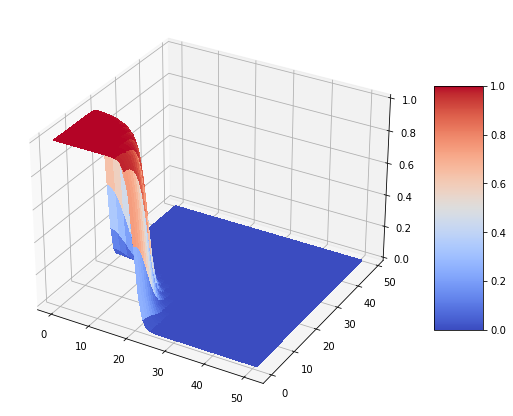

In [19]:
fig = plt.figure(figsize=(9, 9))
#ax  = fig.add_subplot(1, 1, 1)
ax = fig.gca(projection='3d')

# Gitter für den Plot
x_coord = np.array([[delta_x*i for k in range(ngrid)] for i in range(mgrid)])
y_coord = np.array([[delta_x*k for k in range(ngrid)] for i in range(mgrid)])

# Surface-Plot.
surf = ax.plot_surface(x_coord, y_coord, psi, cmap=mpl.cm.coolwarm,
                       linewidth=0, antialiased=False)

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

## Phasenfeldsimulation

In [20]:
#Parameters of the model
Gamma = 50.0                 # [J/m^2] interface energy 
xi    = 4.0                  # [m] phasefield interface width 
M     = 1.0                  # [m^2/s] kinetic coefficient 
mu0   = 0.0                  # [J/m^3] bulk energy density difference (driving force)

delta_t = 1.e-1              # [s] timestep

Neben der Festlegung der Zahl der Zeitschritte für die Hauptzeitschleife, legen wir leere Listen für die momentane Radien und Zeiten an. Der erste Eintrag in den Listen ist der gemessene Ausgangsradius und die Zeit $t=0$. 

In [21]:
nloop   = 1001           # number of time steps 
time    = 0.0
outstep = 10             # the radii are measured only every outstep time step

time_list = []           # list of the times
radi_list = []           # list of the measured radii

area = integral(psi,delta_x)
radius = np.sqrt(4.0*area/np.pi)        
time_list.append(time)
radi_list.append(radius)
print('time = ', time, 'radius = ', radius)

time =  0.0 radius =  19.408865410560303


In der Hauptzeitschleife müssen wir in jedem Zeitschritt zunächst das Differenzphasenfeld mit Hilfe der Phasenfeldgleichung auf Basis des aktuellen Phasenfeldes inklusive der aktuellen Randwerte berechnen. Anschließend wird das Phasenfeld zum neuen Zeitschritt mit Hilfe des Differenzphasenfeldes berechnet und überschrieben. Dann werden die Randwerte zum aktuellen Zeitschritt auf Basis der Randbedingungen berechnet und überschrieben.

In [22]:
#the main time loop
for Step in range(nloop):
    solve_phasefield(psi,dpsi,delta_x,xi,Gamma,mu0,mgrid,ngrid)
    update_phasefield(psi,dpsi,delta_t,M,mgrid,ngrid)
    set_boundary(psi,mgrid,ngrid)
    time += delta_t
    if Step%outstep == 0: # the measurement of the current radius only every outstep steps 
        area = integral(psi,delta_x)
        radius = np.sqrt(4.0*area/np.pi)
        print('time = ', time, 'radius = ', radius)
        time_list.append(time)
        radi_list.append(radius)

time =  0.1 radius =  19.40830555693762
time =  1.0999999999999999 radius =  19.397977252229893
time =  2.1000000000000005 radius =  19.38226910688484
time =  3.1000000000000014 radius =  19.361697520176584
time =  4.100000000000001 radius =  19.336802287860348
time =  5.099999999999998 radius =  19.308087960694014
time =  6.099999999999994 radius =  19.27601315075852
time =  7.099999999999991 radius =  19.240989490175753
time =  8.099999999999987 radius =  19.20338355194721
time =  9.099999999999984 radius =  19.163519859337846
time =  10.09999999999998 radius =  19.12168429697384
time =  11.099999999999977 radius =  19.07812761887208
time =  12.099999999999973 radius =  19.033068898021053
time =  13.09999999999997 radius =  18.986698830986956
time =  14.099999999999966 radius =  18.939182847718126
time =  15.099999999999962 radius =  18.890663998814027
time =  16.09999999999996 radius =  18.8412656070538
time =  17.099999999999973 radius =  18.791093680049364
time =  18.0999999999999

Darstellung des aktuellen Phasenfeldes mit Hilfe der Bibliothek  __[matplotlib](https://matplotlib.org)__.

/tmp/ipykernel_22442/320334087.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax2   = fig2.gca(projection='3d')


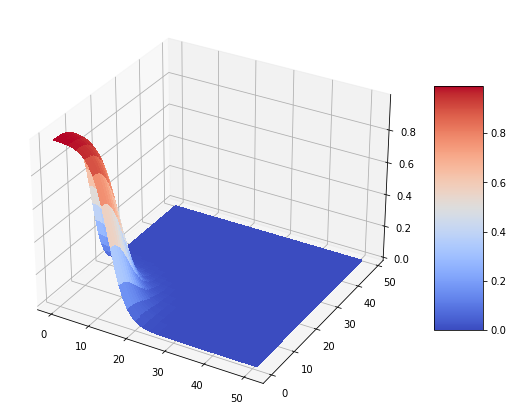

In [23]:
fig2 = plt.figure(figsize=(9, 9))
ax2   = fig2.gca(projection='3d')

# Surface-Plot.
surf = ax2.plot_surface(x_coord, y_coord, psi, cmap=mpl.cm.coolwarm,
                       linewidth=0, antialiased=False)

# Add a color bar which maps values to colors.
fig2.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

## Partikelradiuszeitfunktion

Vergleich des gemessenen Partikelradius als Funktion der Zeit mit der analytischen Radiuszeitfunktion der Übung zur Erstarrung mit gekrümmten Grenzflächen. In der Übung hatten wir für den Fall $\mu_0=0$ die folgende Radiuszeitfunktion berechnet

$$
R(t)=\sqrt{R_{0}^{2}-2K\Gamma t},
$$

wobei $K=M/\Gamma$ der kinetische Koeffizient im sharp interface Modell ist.

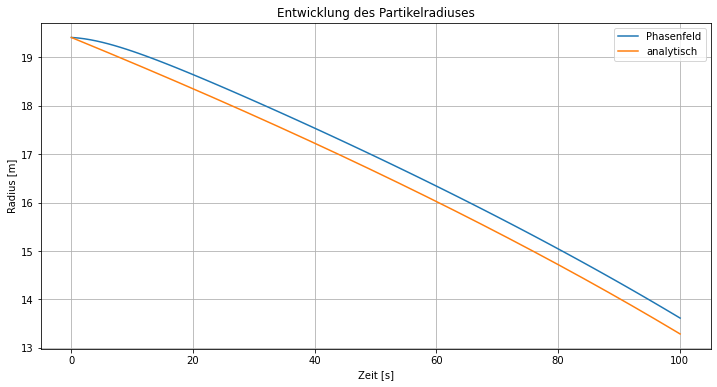

In [24]:
t = np.linspace(0.0, time_list[-1], 500)
radius_theory = np.sqrt(np.maximum(0.0,(radi_list[0]**2 - 2.0*M*t)))

fig3 = plt.figure(figsize=(12, 6))
ax3  = fig3.add_subplot(1, 1, 1)
ax3.set_title("Entwicklung des Partikelradiuses")
ax3.set_xlabel("Zeit [s]")
ax3.set_ylabel("Radius [m]")
ax3.grid()

ax3.plot(time_list, radi_list, label="Phasenfeld")
ax3.plot(t, radius_theory, label="analytisch")
ax3.legend()

plt.show()